# Budyko Transport for Energy Balance Models

In this document an Energy Balance Model (EBM) is set up with the energy tranport parameterized through the the **budyko type parameterization** term (instead of the default diffusion term), which characterizes the local energy flux through the difference between local temperature and global mean temperature.

$$H(\varphi) = - b [T(\varphi) - \bar{T}]$$

where $T(\varphi)$ is the surface temperature across the latitude $\varphi$, $\bar{T}$ the global mean temperature and $H(\varphi)$ is the transport of energy in an Energy Budget noted as:

$$C(\varphi) \frac{dT(\varphi)}{dt} = R\downarrow (\varphi) - R\uparrow (\varphi) + H(\varphi)$$

In [1]:
# import header

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import climlab
from climlab import constants as const
from climlab.domain.field import global_mean

### Model Creation

An EBM model instance is created through

In [2]:
# model creation
ebm_budyko= climlab.EBM()

The model is set up by default with a meridional diffusion term.

In [3]:
# print model states and suprocesses
print ebm_budyko

climlab Process of type <class 'climlab.model.ebm.EBM'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM'>
   diffusion: <class 'climlab.dynamics.diffusion.MeridionalDiffusion'>
   LW: <class 'climlab.radiation.AplusBT.AplusBT'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
   insolation: <class 'climlab.radiation.insolation.P2Insolation'>



### Create new subprocess

The creation of a subprocess needs some information from the model, especially on which model state the subprocess should be defined on.

In [4]:
# create Budyko subprocess
budyko_transp = climlab.dynamics.BudykoTransport(b=3.81,
                                                 state=ebm_budyko.state,
                                                 **ebm_budyko.param)

Note that the model's **whole state dictionary** is given as **input** to the subprocess. In case only the temperature field ``ebm_budyko.state['Ts']`` is given, a new state dictionary would be created which holds the surface temperature with the key ``'default'``. That raises an error as the budyko transport process refers the temperature with key ``'Ts'``.

Now the new transport subprocess has to be merged into the model. The `diffusion` subprocess has to be removed.

In [5]:
# add the new transport subprocess
ebm_budyko.add_subprocess('budyko_transport',budyko_transp)

# remove the old diffusion subprocess
ebm_budyko.remove_subprocess('diffusion')

In [6]:
print ebm_budyko

climlab Process of type <class 'climlab.model.ebm.EBM'>. 
State variables and domain shapes: 
  Ts: (90, 1) 
The subprocess tree: 
top: <class 'climlab.model.ebm.EBM'>
   LW: <class 'climlab.radiation.AplusBT.AplusBT'>
   budyko_transport: <class 'climlab.dynamics.budyko_transport.BudykoTransport'>
   albedo: <class 'climlab.surface.albedo.StepFunctionAlbedo'>
      iceline: <class 'climlab.surface.albedo.Iceline'>
      cold_albedo: <class 'climlab.surface.albedo.ConstantAlbedo'>
      warm_albedo: <class 'climlab.surface.albedo.P2Albedo'>
   insolation: <class 'climlab.radiation.insolation.P2Insolation'>



### Model integration & Plotting

In [7]:
# integrate model for a single timestep
ebm_budyko.step_forward()

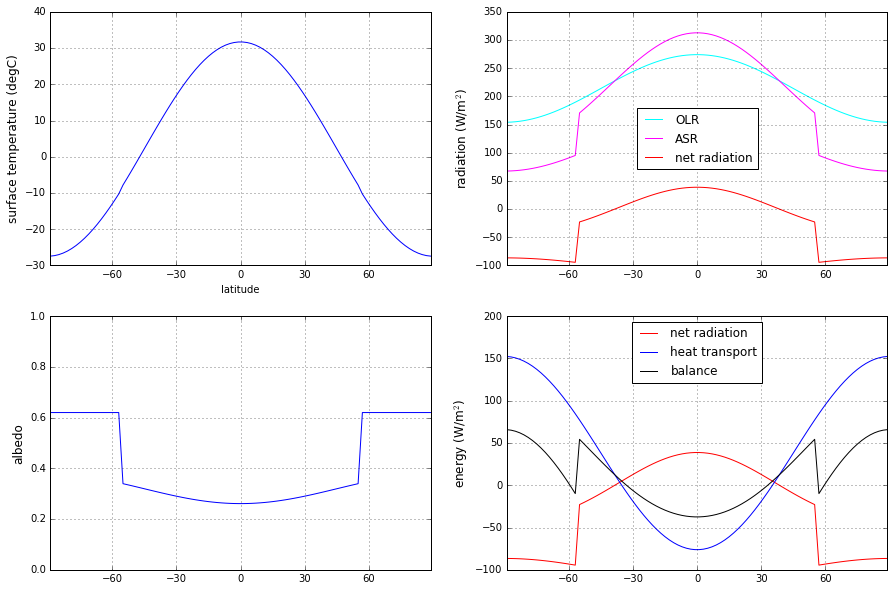

In [8]:
# creating plot figure
fig = plt.figure(figsize=(15,10))

# Temperature plot
ax1 = fig.add_subplot(221)
ax1.plot(ebm_budyko.lat,ebm_budyko.Ts)

ax1.set_xticks([-90,-60,-30,0,30,60,90])
ax1.set_xlim([-90,90])
ax1.set_xlabel('latitude')
ax1.set_ylabel('surface temperature (degC)', fontsize=12)
ax1.grid()

# Albedo plot
ax2 = fig.add_subplot(223, sharex = ax1)
ax2.plot(ebm_budyko.lat,ebm_budyko.albedo)

ax2.set_ylabel('albedo', fontsize=12)
ax2.set_ylim([0,1])
ax2.grid()

# Net Radiation plot
ax3 = fig.add_subplot(222, sharex = ax1)
ax3.plot(ebm_budyko.lat, ebm_budyko.OLR, label='OLR',
                                         color='cyan')
ax3.plot(ebm_budyko.lat, ebm_budyko.ASR, label='ASR',
                                         color='magenta')
ax3.plot(ebm_budyko.lat, ebm_budyko.ASR-ebm_budyko.OLR, 
                                         label='net radiation',
                                         color='red')

ax3.set_ylabel('radiation (W/m$^2$)', fontsize=12)
ax3.legend(loc='best')
ax3.grid()


# Energy Balance plot
net_rad = ebm_budyko.net_radiation
transport = ebm_budyko.subprocess['budyko_transport'].heating_rate['Ts']

ax4 = fig.add_subplot(224, sharex = ax1)
ax4.plot(ebm_budyko.lat, net_rad, label='net radiation', 
                                             color='red')
ax4.plot(ebm_budyko.lat, transport, label='heat transport', 
                                             color='blue')
ax4.plot(ebm_budyko.lat, net_rad+transport, label='balance',
                                             color='black')

ax4.set_ylabel('energy (W/m$^2$)', fontsize=12)
ax4.legend(loc='best')
ax4.grid()


plt.show()

In [9]:
# integrate model until solution converges
ebm_budyko.integrate_converge()

Total elapsed time is 7.01111111111 years.


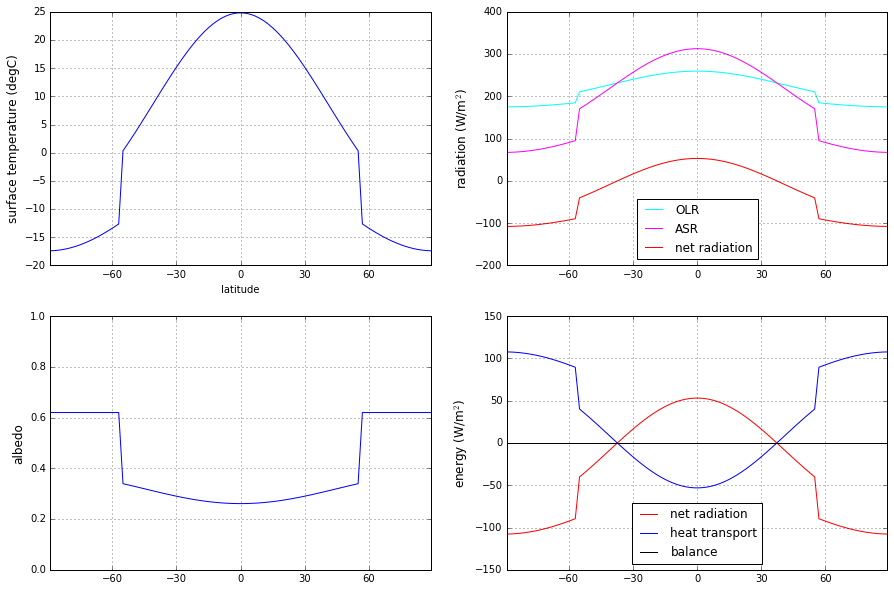

In [10]:
# creating plot figure
fig = plt.figure(figsize=(15,10))

# Temperature plot
ax1 = fig.add_subplot(221)
ax1.plot(ebm_budyko.lat,ebm_budyko.Ts)

ax1.set_xticks([-90,-60,-30,0,30,60,90])
ax1.set_xlim([-90,90])
ax1.set_xlabel('latitude')
ax1.set_ylabel('surface temperature (degC)', fontsize=12)
ax1.grid()

# Albedo plot
ax2 = fig.add_subplot(223, sharex = ax1)
ax2.plot(ebm_budyko.lat,ebm_budyko.albedo)

ax2.set_ylabel('albedo', fontsize=12)
ax2.set_ylim([0,1])
ax2.grid()

# Net Radiation plot
ax3 = fig.add_subplot(222, sharex = ax1)
ax3.plot(ebm_budyko.lat, ebm_budyko.OLR, label='OLR',
                                         color='cyan')
ax3.plot(ebm_budyko.lat, ebm_budyko.ASR, label='ASR',
                                         color='magenta')
ax3.plot(ebm_budyko.lat, ebm_budyko.ASR-ebm_budyko.OLR, 
                                         label='net radiation',
                                         color='red')

ax3.set_ylabel('radiation (W/m$^2$)', fontsize=12)
ax3.legend(loc='best')
ax3.grid()


# Energy Balance plot
net_rad = ebm_budyko.net_radiation
transport = ebm_budyko.subprocess['budyko_transport'].heating_rate['Ts']

ax4 = fig.add_subplot(224, sharex = ax1)
ax4.plot(ebm_budyko.lat, net_rad, label='net radiation', 
                                             color='red')
ax4.plot(ebm_budyko.lat, transport, label='heat transport', 
                                             color='blue')
ax4.plot(ebm_budyko.lat, net_rad+transport, label='balance',
                                             color='black')

ax4.set_ylabel('energy (W/m$^2$)', fontsize=12)
ax4.legend(loc='best')
ax4.grid()


plt.show()

### Global mean temperature

In [11]:
print 'The global mean temperature is %s degC with a model ice edge at %s deg.' \
       %(np.round(global_mean(ebm_budyko.Ts),2), np.max(ebm_budyko.icelat))

The global mean temperature is 10.87 degC with a model ice edge at 56.0 deg.
